In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from bokeh.io import curdoc
curdoc().clear()
from bokeh.io import show
from bokeh.plotting import figure
from bokeh.transform import factor_cmap
from bokeh.palettes import Dark2_5 as palette
import itertools
from bokeh.palettes import d3
#colors has a list of colors which can be used in plots
colors = itertools.cycle(palette)

In [11]:
df = pd.read_csv("amazonbooks.csv")
print("Datatypes before preprocessing the data:")
print(df.dtypes)
# All the datatypes are of Object type

Datatypes before preprocessing the data:
Book Name          object
Author             object
Rating             object
Customers_Rated    object
Price              object
dtype: object


In [12]:
# 1. DATA CLEANING
# Just keep the rating. That is 4.5 out of 5 stars. Keep only '4.5' remove the rest
df['Rating'] = df['Rating'].apply(lambda x: x.split()[0])  # Remove the extra part from the rating.
df['Rating'] = pd.to_numeric(df['Rating'])  # Convert the rating into numeric type data
df["Price"] = df["Price"].str.replace('$', '')  # Remove the dollar sign. Just keep the price
df["Price"] = df["Price"].str.replace(',', '')  # Remove commas from the price.
df['Price'] = df['Price'].apply(lambda x: x.split('.')[0])  # Split the price by dot
df['Price'] = df['Price'].astype(int)  # Convert the price into int datatype
df["Customers_Rated"] = df["Customers_Rated"].str.replace(',', '')  # Remove the commas from the number of customer who rated
df['Customers_Rated'] = pd.to_numeric(df['Customers_Rated'], errors='ignore')  # Convert the customer rated to int datatype
print("Shape of the data: ", df.shape)
print("\nFirst 5 rows of the dataset")
print(df.head(5))
print("Datatypes of the dataset: ")
print(df.dtypes)  # Datatypes after the preprocessing of data

Shape of the data:  (100, 5)

First 5 rows of the dataset
                                           Book Name               Author  \
0                                    A Promised Land         Barack Obama   
1  Atomic Habits: An Easy & Proven Way to Build G...          James Clear   
2  Quit Like a Woman: The Radical Choice to Not D...       Holly Whitaker   
3                                            Untamed        Glennon Doyle   
4                                        Greenlights  Matthew McConaughey   

   Rating  Customers_Rated  Price  
0     4.9            36481     21  
1     4.8            21927     11  
2     4.5              919     17  
3     4.6            32955     11  
4     4.7            13620     18  
Datatypes of the dataset: 
Book Name           object
Author              object
Rating             float64
Customers_Rated      int64
Price                int64
dtype: object


In [13]:
# 2. DEALING WITH NAN VALUES
# Replace the zero values (both int and string) to NaN
df.replace(str(0), np.nan, inplace=True)
df.replace(0, np.nan, inplace=True)

In [14]:
# Count the number of NaN values
count_nan = len(df) - df.count()
print("\nNumber of Nan Values:")
print(count_nan)


Number of Nan Values:
Book Name          0
Author             0
Rating             0
Customers_Rated    1
Price              2
dtype: int64


In [15]:
# Drop the NaN values
df = df.dropna()


Highest Priced Books:
                                            Book Name  \
34  Tasha's Cauldron of Everything (D&D Rules Expa...   
49  Plant Over Processed: 75 Simple & Delicious Pl...   
39  Modern Comfort Food: A Barefoot Contessa Cookbook   
0                                     A Promised Land   
51  Publication Manual of the American Psychologic...   
58  Salt, Fat, Acid, Heat: Mastering the Elements ...   
13           The Boy, the Mole, the Fox and the Horse   
16  Caste (Oprah's Book Club): The Origins of Our ...   
91     New Morning Mercies: A Daily Gospel Devotional   
89  Love is the Way: Holding on to Hope in Troubli...   
88  Instant Loss on a Budget: Super-Affordable Rec...   
48  Eat Smarter: Use the Power of Food to Reboot Y...   
69             Player's Handbook (Dungeons & Dragons)   
37  5 Ingredient Semi-Homemade Meals: 50 Easy & Ta...   
4                                         Greenlights   

                                Author  Rating  Customers_Rated 

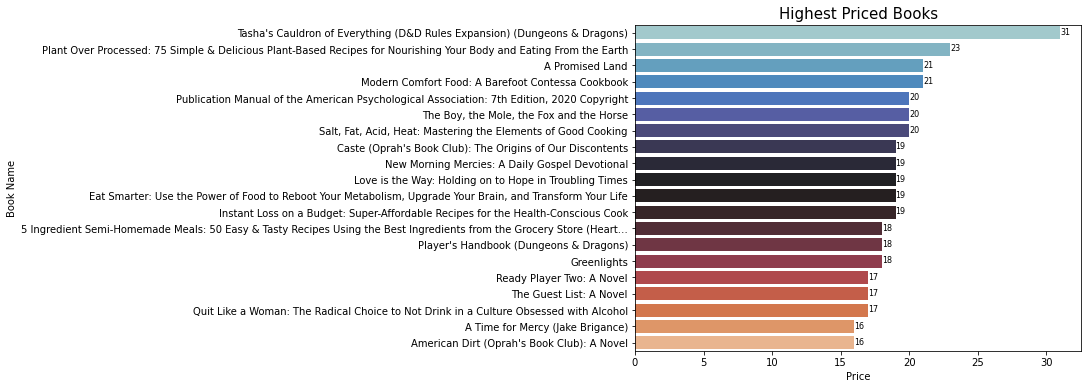

In [16]:
# 3. DATA ANALYSIS AND VISUALISATION
# Authors with the highest-priced book
highpricedbook = df.sort_values(["Price"], axis=0, ascending=False)[:15]
print("\nHighest Priced Books:")
print(highpricedbook)
# plot showing the highest priced books
priceybook = df.groupby(by='Book Name')['Price'].sum().sort_values(ascending =False).head(20).reset_index()
plt.figure(figsize=(8,6))
plt.xlabel('Price',fontsize=10)
plt.ylabel('Book Name',fontsize=10)
plt.title('Highest Priced Books',fontsize = 15)
ax = sns.barplot(x= priceybook['Price'],y = priceybook['Book Name'], palette='icefire')
for i ,(value,name) in enumerate (zip(priceybook['Price'], priceybook['Book Name'])):
    ax.text(value, i-.05,f'{value:,.0f}',size = 8,ha='left',va='center')
ax.set(xlabel='Price',ylabel='Book Name')
plt.show()

In [17]:
# Authors have the top-rated books and which books of those authors are top rated
# Filter out those authors in which less than 1000 customers rated
ratingthousand = df[df['Customers_Rated'] > 1000]
topratedbook = ratingthousand.sort_values(['Rating'],axis=0, ascending=False)[:15]
print("\nTop-Rated Books:")
print(topratedbook)


Top-Rated Books:
                                            Book Name            Author  \
0                                     A Promised Land      Barack Obama   
14  Forgiving What You Can't Forget: Discover How ...    Lysa TerKeurst   
91     New Morning Mercies: A Daily Gospel Devotional  Paul David Tripp   
78        The Deep End (Diary of a Wimpy Kid Book 15)       Jeff Kinney   
68                                          Home Body         Rupi Kaur   
63  Think Like a Monk: Train Your Mind for Peace a...        Jay Shetty   
60                 Llewellyn's 2021 Witches' Datebook    Mickie Mueller   
55               Sierra Club Wilderness Calendar 2021       Sierra Club   
37  5 Ingredient Semi-Homemade Meals: 50 Easy & Ta...     Bobby Parrish   
27                    I Love You to the Moon and Back   Amelia Hepworth   
99    Cat Kid Comic Club: From the Creator of Dog Man        Dav Pilkey   
5   2021 The Legacy of Ruth Bader Ginsburg Wall Ca...       Sourcebooks   
10  Dis


Best Rated Author and Book
                                            Book Name              Author  \
31  The 5 Love Languages: The Secret to Love that ...        Gary Chapman   
19                            Where the Crawdads Sing         Delia Owens   
20                               Becoming (182 GRAND)      Michelle Obama   
22                                       Midnight Sun     Stephenie Meyer   
52                                 The Silent Patient    Alex Michaelides   
61  The Alchemist, 25th Anniversary: A Fable About...        Paulo Coelho   
47  My First Learn to Write Workbook: Practice for...       Crystal Radke   
13           The Boy, the Mole, the Fox and the Horse     Charlie Mackesy   
15  Rich Dad Poor Dad: What the Rich Teach Their K...  Robert T. Kiyosaki   
70  The Subtle Art of Not Giving a F*ck: A Counter...         Mark Manson   
7   The Four Agreements: A Practical Guide to Pers...     Don Miguel Ruiz   
0                                     A Promised

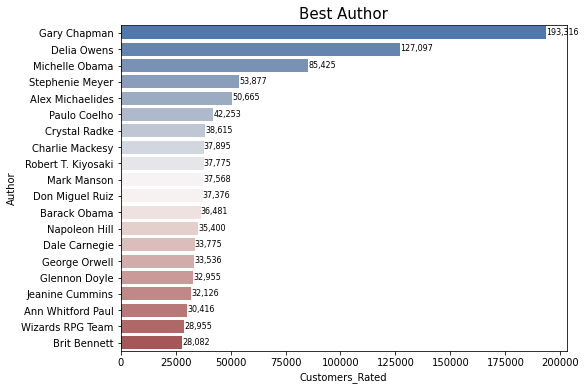

In [18]:
# Top Rated Author
bestbookauthor = df.sort_values(["Customers_Rated"], axis=0, ascending=False)[:20]
print("\nBest Rated Author and Book")
print(bestbookauthor)
# Plot showing the top rated author
bestauthor = df.groupby(by='Author')['Customers_Rated'].sum().sort_values(ascending =False).head(20).reset_index()
plt.figure(figsize=(8,6))
plt.xlabel('Customers_Rated',fontsize=10)
plt.ylabel('Author',fontsize=10)
plt.title('Best Author',fontsize = 15)
ax = sns.barplot(x= bestauthor['Customers_Rated'],y = bestauthor['Author'], palette='vlag')
for i ,(value,name) in enumerate (zip(bestauthor['Customers_Rated'], bestauthor['Author'])):
    ax.text(value, i-.05,f'{value:,.0f}',size = 8,ha='left',va='center')
ax.set(xlabel='Customers_Rated',ylabel='Author')
plt.show()

In [19]:
# Rating vs Books and Author
# Bokeh Plot
palette = d3['Category20'][20]
index_cmap = factor_cmap('Author', palette=palette,
                         factors=bestbookauthor["Author"])
p = figure(plot_width=700, plot_height=700, title = "Top Authors: Rating vs. Customers Rated")
p.scatter('Rating','Customers_Rated',source=bestbookauthor,fill_alpha=0.6, fill_color=index_cmap,size=20,legend='Author')
p.xaxis.axis_label = 'RATING'
p.yaxis.axis_label = 'CUSTOMERS RATED'
p.legend.location = 'top_left'
show(p)